## Desafío Evaluado 4. Random Forest

### Preparación del ambiente de trabajo

● Importe las librerías clásicas a utilizar

● Para este ejercicio Random Forest de Regresión

● De manera adicional importe las funciones y clases necesarias para generar undesempeño de métricas en problemas de regresión

● Elimine la columna 'Unnamed: 0' cuando cargue los datos

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

import sys
#sys.path.append('../../utils')
import lec8_graphs as afx
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')
df.head(5)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


### Importación de archivos serializados

● Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.

● No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.

● Para importar un archivo serializado, puede ocupar la siguiente línea de código:

import pickle read_model = pickle.load(open("ignacio-soto-act07.sav","rb"))

In [3]:
#Para cargar el archivo que anteriormente guardamos:
model = pickle.load(open('modelo_save.sav','rb'))
X_train = pickle.load(open('X_train.sav','rb'))
X_test = pickle.load(open('X_test.sav','rb'))
y_train = pickle.load(open('y_train.sav','rb'))
y_test = pickle.load(open('y_test.sav','rb'))


In [9]:
def report_cont_metrics(model, y_true=y_test, X_test=X_test):
    fit_model = model.predict(X_test)
    print("-"*30)
    print('Error cuadratico medio:')
    print(mean_squared_error(y_true, fit_model).round(3))
    print("-"*30)
    print('Desviacion media absoluta:')
    print(median_absolute_error(y_true, fit_model).round(3))
    print("-"*30)
    print('Error cuadratico R2:')
    print(r2_score(y_true, fit_model).round(3))

In [10]:
report_cont_metrics(model)

------------------------------
Error cuadratico medio:
1897480058.245
------------------------------
Desviacion media absoluta:
18122.341
------------------------------
Error cuadratico R2:
0.666


### Evaluación Random Forest

● En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiper parámetros, sólo declarando la semilla pseudoaleatoria.

● Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero

In [11]:
modelo1 = RandomForestRegressor(oob_score=True,random_state=11238).fit(X_train, y_train)

In [13]:
print("MSE:", mean_squared_error(y_test, modelo1.predict(X_test)).round(4))
print("MAE:", median_absolute_error(y_test, modelo1.predict(X_test)).round(4))
print("R2:", r2_score(y_test, modelo1.predict(X_test)).round(4))

MSE: 1037339226.8861
MAE: 12146.99
R2: 0.8175


In [15]:
print('-'*30)
print("Modelo RandomForestRegressor:")
print('-'*30)
print("MSE:", mean_squared_error(y_test, modelo1.predict(X_test)).round(4))
print("MAE:", median_absolute_error(y_test, modelo1.predict(X_test)).round(4))
print("R2:", r2_score(y_test, modelo1.predict(X_test)).round(4))
print('-'*30)
print("Modelo DecisionTreeRegressor:")
print('-'*30)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)).round(4))
print("MAE:", median_absolute_error(y_test, model.predict(X_test)).round(4))
print("R2:", r2_score(y_test, model.predict(X_test)).round(4))

------------------------------
Modelo RandomForestRegressor:
------------------------------
MSE: 1037339226.8861
MAE: 12146.99
R2: 0.8175
------------------------------
Modelo DecisionTreeRegressor:
------------------------------
MSE: 1897480058.2454
MAE: 18122.3405
R2: 0.6661


### Métricas de desempeño

● Para afinar el comportamiento de nuestro modelo, evalúe su desempeño con los siguientes hiper parámetros:

○ max_features: None, log2, sqrt.
○ n_estimators: Evaluar entre 20 y 1000 en pasos de 50.

● Guarde la tasa de error en la exactitud medida con OOB

● Grafique el comportamiento.

In [17]:
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
tmp_test_mse_none, tmp_test_mse_sqrt, tmp_test_mse_log = [], [], []
n_estimators = range(20, 1000, 25)

for i in n_estimators:
    
    modelo1_none = RandomForestRegressor(n_estimators= i,
                                            max_features=None, 
                                            oob_score=True,
                                            random_state=111).fit(X_train, y_train)

    modelo1_sqrt = RandomForestRegressor(n_estimators= i, 
                                            max_features="sqrt",
                                            warm_start=True,
                                            oob_score=True,
                                            random_state=111).fit(X_train, y_train)
    
    modelo1_log = RandomForestRegressor(n_estimators= i,
                                           max_features="log2",
                                           warm_start=True,
                                           oob_score=True,
                                           random_state=111).fit(X_train, y_train)

    
    tmp_oob_none.append(1 - modelo1_none.oob_score_)
    tmp_oob_sqrt.append(1 - modelo1_sqrt.oob_score_)
    tmp_oob_log2.append(1 - modelo1_log.oob_score_)

    #Aplicar metricas para RandomForestRegressor sustituir accuracy
    
    tmp_test_mse_none.append(1 - r2_score(y_test, modelo1_none.predict(X_test)))
    tmp_test_mse_sqrt.append(1 - r2_score(y_test,modelo1_sqrt.predict(X_test)))
    tmp_test_mse_log.append(1 - r2_score(y_test,modelo1_log.predict(X_test)))

<Figure size 1152x720 with 0 Axes>

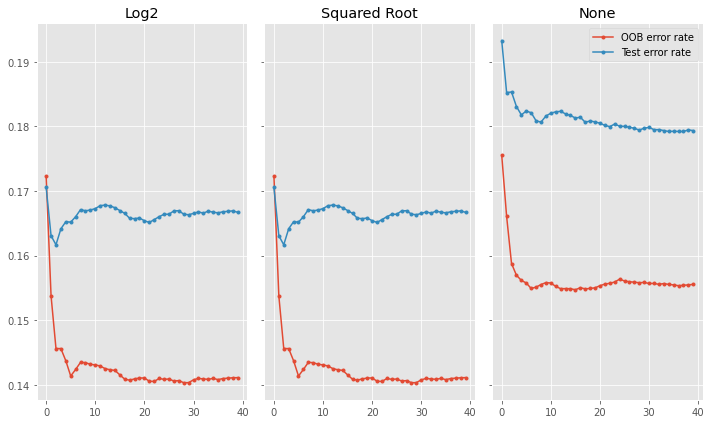

In [18]:
plt.figure(figsize=(16, 10));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].plot(tmp_test_mse_log, '.-', label='Test error rate');
axs[0].set_title('Log2');
axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].plot(tmp_test_mse_sqrt,'.-', label='Test error rate');
axs[1].set_title('Squared Root');
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].plot(tmp_test_mse_none,'.-', label='Test error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

### Refactorización del modelo

● En base a la mejor combinación de hiper parámetros, reentrene el modelo y comente su desempeño.

In [20]:
modelo_refactorizado = RandomForestRegressor(max_features="sqrt",
                                    warm_start=True,
                                    oob_score=True,
                                    random_state=111).fit(X_train, y_train)

In [21]:
print("MSE:", mean_squared_error(y_test, modelo_refactorizado.predict(X_test)).round(4))
print("MAE:", median_absolute_error(y_test, modelo_refactorizado.predict(X_test)).round(4))
print("R2:", r2_score(y_test, modelo_refactorizado.predict(X_test)).round(4))

MSE: 932489890.5389
MAE: 12844.0
R2: 0.8359


In [22]:
# Metrica modelo RandomForestRegressor sin parametros solo con random_state
print("R2:", r2_score(y_test, modelo1.predict(X_test)).round(4))

R2: 0.8175


In [23]:
# Modelo sesion anterior ocupando DecisionTreeRegressor
print("R2:", r2_score(y_test, model.predict(X_test)).round(4))

R2: 0.6661


In [24]:
model

DecisionTreeRegressor(max_depth=6, max_features=3)